### TODOS

- [x] Remove names from everything except first 2 turns
- [x] add dataset name to joined dataset
- [x] end chat token should be loss making
- [x] add thought section instructions to non-loss
- [x] make samantha dialog longer
- [x] add instructions like, keep it conversational. write small outputs. give detailed answer

### New Datasets

- [x] lukasmoeller/sail_preprocessed
- [x] sl-alex/openai-prm800k-stepwise-best
- [x] metaeval/reclor
- [x] glaiveai/glaive-function-calling
- [x] spencer/dialogsum_reformat
- [x] heliosbrahma/mental_health_chatbot_dataset
- [x] nbertagnolli/counsel-chat
- [x] NEG NEG glaiveai/glaive-function-calling

- [x] skeskinen/TinyStories-Instruct-hf
- [x] jkhedri/psychology-dataset
- [x] tiedong/goat
- [x] Jellywibble/dalio_handwritten-conversations
- [x] stacked-summaries/stacked-samsum-1024
- [x] shahules786/orca-best
- [x] https://uwnlp.github.io/storycommonsense/
- [x] https://github.com/wenhuchen/Time-Sensitive-QA/tree/main/dataset
- [x] griffin/chain_of_density
- [x] v2ray/airoboros-2.2-dealignment (filtered)
- [x] whitefox44/ReflectionGPT4
- [x] Villian7/Emotions_Data
- [x] allenai/soda
- [x] https://github.com/OFA-Sys/ExpertLLaMA
- [x] openbmb/UltraFeedback
- [x] LDJnr/Verified-Camel
- [x] LDJnr/Pure-Dove
- [x] ehartford/samantha-data philosophy conversations
- [x] THUDM/AgentInstruct
- [x] jane blog posts

### Postponed

- [ ] remove unused tokens
- [ ] filter using alpagasus
- [ ] add everything then tag and rate
- [ ] Add I should “think” about this before answering to the prompts for rows with chain of thought turns
- [ ] psychology textbooks
- [ ] obligation stack
- [ ] fix calendar dataset
- [ ] Add InsTagger tags

### Additional interesting datasets
- beliefbank https://arxiv.org/abs/2109.14723
- facebook/belebele (cross lang)
- taesiri/arxiv_qa
- chats-bug/agent_action_plan
- jane conversations
- hypnotherapy
- BarDa https://docs.google.com/spreadsheets/d/1__NmJMUnIhAIBzjZTO5vqBQQu_eZfzCCrU5orGRnMgY/edit#gid=578952663
- pietrolesci/dialogue_nli

In [1]:
from datasets import concatenate_datasets, load_dataset, DownloadMode

# source names
sources = dict(
    #############################
    ### SAMANTHA DIALOG STYLE ###
    #############################

    camel="diwank/camel-subjects",
    dolly_orca="diwank/samantha-dolly-v2-orca",
    therapy="diwank/samantha-therapy",
    debater_evidence="diwank/samantha-debate-evidence",
    debater_argq="diwank/samantha-debate-argq",
    function_explanation="diwank/samantha-function-explanation",
    counsel_chat="diwank/samantha-counsel-chat",
    dalio="diwank/samantha-dalio-chatml",
    psychology_data="diwank/samantha-psychology-data",
    intent="diwank/samantha-intent",
    dialog="diwank/samantha-movie-dialog-4k",
    philosophy="diwank/samantha-philosophy-chatml",
    calendar="diwank/samantha-calendar-v2",
    blog="diwank/samantha_blog-chatml",

    ##############
    ### OTHERS ###
    ##############
    
    prm800k="diwank/prm800k-chatml",
    openbookqa="diwank/openbookqa_chatml",
    gpt_roleplay_realm="diwank/gpt_roleplay_realm-chatml",
    coqa="diwank/coqa-chatml",
    daily_dialog="diwank/daily_dialog-chatml",
    ambig_qa="diwank/ambig_qa-chatml",
    reclor="diwank/reclor-chatml",
    glaive="diwank/glaive-chatml",
    glaive_neg="diwank/glaive-neg-chatml",
    glaive_neg_neg="diwank/glaive-neg-neg-chatml",
    goat="diwank/goat-chatml",
    orca_best="diwank/orca_best_one_each-chatml",
    chain_of_density="diwank/chain_of_density-chatml",
    time_sensitive_qa="diwank/time_sensitive_qa-chatml",
    dealignment="diwank/dealignment-chatml",
    reflection_gpt4="diwank/reflection_gpt4-chatml",
    emotions_data="diwank/emotions_data-chatml",
    expertllama="diwank/expertllama-chatml",
    airoboros_filtered="diwank/airoboros-filtered",
    verified_camel="diwank/verified-camel-chatml",
    pure_dove="diwank/pure-dove-chatml",

    #############
    
    ############
    ### Todo ###
    ############

    # sail="diwank/sail_preprocessed-chatml",
    # jokes="diwank/jokes-dataset",
    
    ###############
    ### Removed ###
    ###############

    # Meh. Poor quality
    # lima="diwank/samantha-lima-2k",

    # Meh. Poor quality
    # tinystories="diwank/tinystories-chatml",

    # Meh. Poor quality
    # agent_instructions="diwank/agent_instructions-chatml",

    # Meh. Poor quality
    # ultrafeedback="diwank/ultrafeedback-chatml",

    # Meh. Poor quality
    # storycommonsense="diwank/storycommonsense-chatml",

    # Meh. Poor quality
    # soda="diwank/soda-chatml",

    # Turned out to be poor quality and it's too expensive to fix... :(
    # gpt4="diwank/samantha-gpt4-llm-cleaned-2k",

    # Removed in favor of glaive
    # airoboros_agent="diwank/airoboros-agent",
    
    # Removed in favor of alpaca-gpt4
    # chatalpaca="diwank/chatalpaca-20k-chatml",

    # Removed in favor of stacked samsum
    # samsum="diwank/samantha-samsum", # Move summarization to thought/information only
    # dialogsum="spencer/dialogsum_reformat",

    # Poor quality
    # self_aware="diwank/samantha-self_aware-chatml",
    
    # Really poor quality; should be removed
    # bluemoon_fandom="diwank/bluemoon-pruned-chatml",

    # Toolformer is shit compared to airoboros agent and glaive
    # toolformer="diwank/samantha-toolformer-dataset",
    
    # Stacked samsum is not formatted properly
    # stacked_samsum="diwank/stacked-samsum-chatml",

)

datasets = {
    name: load_dataset(source).map(
        lambda x: dict(source=source)
    )
    for name, source in sources.items()
}

datasets = {
    name: concatenate_datasets([
        dataset[split]
        for split in list(dataset.keys())
    ])
    for name, dataset in datasets.items()
}


In [2]:
dataset_lens = {
    name: len(dataset)
    for name, dataset in datasets.items()
}
dataset_lens

{'camel': 5601,
 'dolly_orca': 1667,
 'therapy': 95,
 'debater_evidence': 5783,
 'debater_argq': 23128,
 'function_explanation': 2768,
 'counsel_chat': 2775,
 'dalio': 69,
 'psychology_data': 2324,
 'intent': 4103,
 'dialog': 34,
 'philosophy': 332,
 'calendar': 111,
 'blog': 15,
 'prm800k': 2352,
 'openbookqa': 1209,
 'gpt_roleplay_realm': 4536,
 'coqa': 7699,
 'daily_dialog': 13118,
 'ambig_qa': 12038,
 'reclor': 10276,
 'glaive': 41767,
 'glaive_neg': 1348,
 'glaive_neg_neg': 1348,
 'goat': 6652,
 'orca_best': 328906,
 'chain_of_density': 768,
 'time_sensitive_qa': 17510,
 'dealignment': 1813,
 'reflection_gpt4': 99,
 'emotions_data': 55814,
 'expertllama': 52002,
 'airoboros_filtered': 25714,
 'verified_camel': 127,
 'pure_dove': 3857}

In [3]:
multiplier = {
    'dialog': 200, # 43,
    'camel': 20, # 5601
    'therapy': 300, # 95,
    'calendar': 50, # 111,
    'gpt_roleplay_realm': 5, # 4536
    "dealignment": 5, # 1813
    "verified_camel": 200, # 127
    "philosophy": 70, # 332
    "counsel_chat": 20, # 2775
    "dalio": 200, # 69
    "psychology_data": 10, # 2324
    "glaive_neg": 5, # 1348
    "glaive_neg_neg": 5, # 1348
    'dolly_orca': 3, # 1667
    'blog': 50, # 15
    'function_explanation': 2,  # 2768
    'prm800k': 5, # 2352
    'openbookqa': 5, # 1209
    'chain_of_density': 10, # 768
    'reflection_gpt4': 100, # 99
}

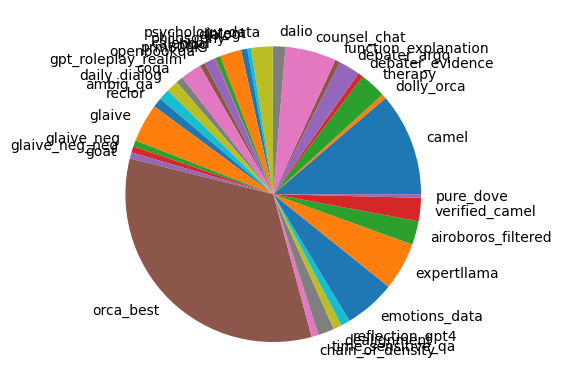

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# if using a Jupyter notebook, includue:
%matplotlib inline

splits = [
    # (name, length)
    (name, length * multiplier.get(name, 1))
    for name, length
    in dataset_lens.items()
    # if name != "orca_best"
]

labels, y = zip(*splits)
plt.pie(y, labels=labels)
plt.show() 

In [5]:
def pluck(ls, keys):
    return [
        {k: d[k] for k in keys}
        for d in ls
    ]
    

def fix_dataset(ds):
    # Only keep chatml column
    ds = ds.remove_columns(list(set(ds.column_names) - {"chatml", "source"}))
    
    return ds
    

dataset_list = [
    fix_dataset(ds)
    for name, dataset in datasets.items()
    for ds in [dataset] * multiplier.get(name, 1)
]

In [6]:
joined = concatenate_datasets(dataset_list)

In [7]:
assistant_me_map = {
    "user": "person",
    "assistant": "me",
    "function_call": "function_call",
}

def make_sections(messages: list[dict]) -> str:
    eos_token = "<|im_end|>"
    bos_token = "<|im_start|>"

    result = bos_token + (eos_token+'\n'+bos_token).join([
        (
            f"{message['name']}"
            if message['role'] == 'system' else
            f"""{assistant_me_map[message['role']]}{
                ' (' + message['name'] + ')'
                if i <= 4 and message.get('name')
                else ''
            }"""
        )
        + f"\n{message['content'].strip()}"
        for i, message in enumerate(messages)
    ]) + eos_token

    return result

In [8]:
should_split = lambda section: (
    section["role"] == "assistant"
    or section["role"] == "function_call"
    or (
        section["role"] == "system"
        and section["name"] in ["thought"]
    )
)

def create_splits(chatml):
    split_idxs = [i for i, m in enumerate(chatml) if should_split(m)]

    splits = [
        (chatml[:idx], chatml[idx])
        for idx in split_idxs
    ]
    
    return splits


def batch_split(rows):
    chatmls = rows["chatml"]
    sources = rows["source"]

    new_sources = []
    split_pairs = []
    for source, chatml in zip(sources, chatmls):
        created_splits = create_splits(chatml)
        new_sources.extend([source] * len(created_splits))

        for splits in created_splits:
            split_pairs.append(splits)

    prompt_chatmls, response_chatmls = zip(*split_pairs)
    
    return dict(
        prompt_chatml=list(prompt_chatmls),
        response_chatml=list(response_chatmls),
        chatml=[None] * len(prompt_chatmls),
        source=new_sources,
    )


In [9]:
joined = joined.map(batch_split, batched=True).remove_columns(["chatml"])

Map:   0%|          | 0/994314 [00:00<?, ? examples/s]

In [10]:
def transform_to_prompt_response(sample):

    prompt_chatml = sample["prompt_chatml"]
    response_chatml = sample["response_chatml"]
    
    prompt = make_sections(prompt_chatml)
    response = make_sections([response_chatml])
    
    if response_chatml["name"] == "thought":
        [response_prefix, *rest_response] = response.split('\n\n')
        prompt += response_prefix + '\n\n'

    elif response_chatml["role"] == "function_call":
        rest_response = response.split('\n')

    else:
        [response_prefix, *rest_response] = response.split('\n')
        prompt += response_prefix + '\n'

    response = '\n'.join(rest_response)
    
    return dict(
        prompt=prompt,
        response=response,
    )

def calc_tokens(row):
    prompt = row['prompt']
    response = row['response']

    token_count = len(prompt+response) // 3.5
    return dict(token_count=token_count)


In [11]:
pr_joined = joined.map(transform_to_prompt_response, num_proc=32)

Map (num_proc=32):   0%|          | 0/2745611 [00:00<?, ? examples/s]

In [12]:
pr_joined = pr_joined.map(calc_tokens, num_proc=32)

Map (num_proc=32):   0%|          | 0/2745611 [00:00<?, ? examples/s]

In [13]:
pr_joined = pr_joined.shuffle(seed=42).train_test_split(0.15)

In [14]:
from pprint import pprint
import random

source_names = list(sources.values())

while len(source_names):
    row = pr_joined["train"][random.randint(0, len(pr_joined["train"]))]
    if row["source"] not in source_names:
        continue

    pprint(row)
    print()
    print()
    print()

    # Remove source from source_names
    source_names.remove(row["source"])

{'prompt': '<|im_start|>situation\n'
           'Samantha is talking to Adriana about topics that she is interested '
           'in.<|im_end|>\n'
           '<|im_start|>person (Adriana)\n'
           "Hey Samantha, I'm really stuck right now.<|im_end|>\n"
           '<|im_start|>me (Samantha)\n'
           "What's troubling you, Adriana?<|im_end|>\n"
           '<|im_start|>person (Adriana)\n'
           "It's my boss, he gave me this task and I just can't see how it'll "
           'help us towards our goal. Feels like a dumb move, '
           'honestly.<|im_end|><|im_start|>me (Samantha)\n',
 'prompt_chatml': [{'content': 'Samantha is talking to Adriana about topics '
                               'that she is interested in.',
                    'name': 'situation',
                    'role': 'system'},
                   {'content': "Hey Samantha, I'm really stuck right now.",
                    'name': 'Adriana',
                    'role': 'user'},
                   {'cont

In [15]:
pr_joined.push_to_hub("julep-ai/samantha-dataset-v6-all-prompt_response", private=True)

Pushing dataset shards to the dataset hub:   0%|          | 0/19 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/123 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/19 [00:00<?, ?it/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/103 [00:00<?, ?ba/s]

Deleting unused files from dataset repository:   0%|          | 0/4 [00:00<?, ?it/s]